In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Define image size and directories
IMAGE_SIZE = [224, 224]  # VGG16 uses 224x224 input size
train_directory = r"C:\Users\ken\OneDrive\Desktop\img.class\melon_dataset\train"
test_directory = r"C:\Users\ken\OneDrive\Desktop\img.class\melon_dataset\test"
val_directory = r"C:\Users\ken\OneDrive\Desktop\img.class\melon_dataset\val"

In [3]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [4]:
# Data augmentation for testing set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Load training and testing sets with data augmentation
training_set = train_datagen.flow_from_directory(
    train_directory,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_directory,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

Found 1615 images belonging to 10 classes.
Found 550 images belonging to 10 classes.


In [6]:
# Add preprocessing layer to the front of DenseNet121
densenet = DenseNet201(input_shape=(224, 224, 3), weights='imagenet', include_top=False)



74836368/74836368 [==============================] - 5s 0us/step


In [7]:
# Freeze the layers
for layer in densenet.layers:
    layer.trainable = False
    
# Global Average Pooling
x = GlobalAveragePooling2D()(densenet.output)

# Fully Connected Layer
x = Dense(128, activation='relu')(x)

# Output Layer
output_tensor = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=densenet.input, outputs=output_tensor)

In [8]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [9]:
# Train the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10


51/51 [==============================] - 162s 3s/step - loss: 0.8496 - accuracy: 0.7567 - val_loss: 0.4127 - val_accuracy: 0.8855
Epoch 2/10
51/51 [==============================] - 142s 3s/step - loss: 0.2219 - accuracy: 0.9362 - val_loss: 0.2261 - val_accuracy: 0.9327
Epoch 3/10
51/51 [==============================] - 138s 3s/step - loss: 0.1360 - accuracy: 0.9635 - val_loss: 0.1963 - val_accuracy: 0.9200
Epoch 4/10
51/51 [==============================] - 137s 3s/step - loss: 0.1196 - accuracy: 0.9635 - val_loss: 0.1827 - val_accuracy: 0.9382
Epoch 5/10
51/51 [==============================] - 149s 3s/step - loss: 0.0788 - accuracy: 0.9814 - val_loss: 0.2049 - val_accuracy: 0.9418
Epoch 6/10
51/51 [==============================] - 137s 3s/step - loss: 0.0682 - accuracy: 0.9802 - val_loss: 0.1378 - val_accuracy: 0.9564
Epoch 7/10
51/51 [==============================] - 141s 3s/step - loss: 0.0379 - accuracy: 0.9926 - val_loss: 0.1544 - val_accuracy: 0.9582
Epoch 8/10


In [10]:
# Save the model
model.save('melon_species_densenet201.h5')

C:\Users\ken\anaconda31\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


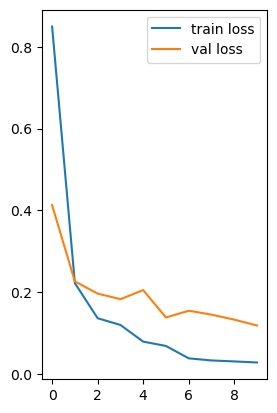

In [11]:
# Plot loss and accuracy curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

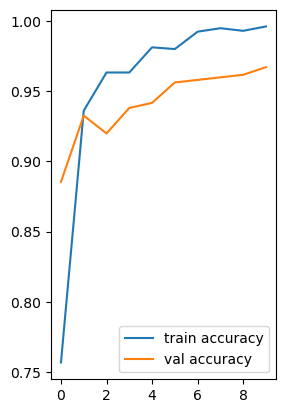

In [12]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()